The following notebook is a data exploration notebook for LITS data set 
https://competitions.codalab.org/competitions/17094

*Labels*
- background - 0
- Liver - 1
- Liber lession - 2


#### Imports

In [1]:
import nibabel as nib
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np

#### Functions

In [2]:
def display_slice_with_gt(slice_index, alpha=0.5):
    plt.figure(figsize=(6, 6))
    
    # Display the image slice
    plt.imshow(ct_image_data[:, :, slice_index], cmap="gray")
    
    # Overlay the GT slice with transparency
    plt.imshow(gt_image_data[:, :, slice_index], cmap="jet", alpha=alpha)  # 'jet' colormap for GT
    
    plt.title(f"Slice {slice_index + 1} of {num_slices}")
    plt.axis('off')  # Turn off axis labels
    plt.show()

#### Inputs

In [39]:
# nii files display
idx = 0
gt_path = fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\labels\segmentation-{idx}.nii'
ct_path = fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\images\volume-{idx}.nii'

In [40]:
gt_img = nib.load(gt_path)
ct_img = nib.load(ct_path)

In [41]:
gt_image_data = gt_img.get_fdata()
ct_image_data = ct_img.get_fdata()

In [42]:
gt_image_data.shape

(512, 512, 75)

In [43]:
np.unique(gt_image_data[:,:,450])

IndexError: index 450 is out of bounds for axis 2 with size 75

In [44]:
num_slices = ct_image_data.shape[2]

In [45]:
slice_slider = widgets.IntSlider(min=0, max=num_slices-1, step=1, description="Slice")
alpha_slider = widgets.FloatSlider(min=0.0, max=1.0, step=0.1, value=0.5, description="Alpha")

In [46]:
widgets.interact(display_slice_with_gt, slice_index=slice_slider, alpha=alpha_slider)

interactive(children=(IntSlider(value=0, description='Slice', max=74), FloatSlider(value=0.5, description='Alp…

<function __main__.display_slice_with_gt(slice_index, alpha=0.5)>

In [72]:
# npy files display after CT preprocessing
slice = '14'
npy_img_path = fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\npy\CT_liver_train\imgs\CT_liver_train_segmentation-{idx}.nii-0{slice}.npy'
npy_gt_path =fr'C:\Users\97254\Desktop\Resources\TAU\dl_medical_imaging\project\datasets\LITS\ct\Training_Batch_1\npy\CT_liver_train\gts\CT_liver_train_segmentation-{idx}.nii-0{slice}.npy'

In [73]:
npy_img = np.load(npy_img_path)
npy_gt = np.load(npy_gt_path)

In [74]:
np.unique(npy_gt)

array([0, 1, 4], dtype=uint8)

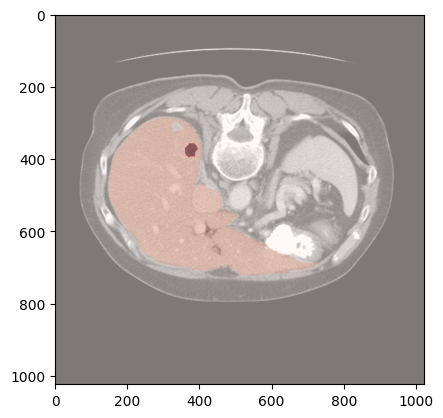

In [75]:
from matplotlib import cm
plt.imshow(npy_img, cmap='gray')
plt.imshow(npy_gt, cmap='Reds', alpha=0.5)
plt.show()